In [18]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import math
data = np.load("C:\\Users\\baljyot\\Downloads\\mnist.npz")

In [19]:
x_train=data['x_train']
y_train=data['y_train']
x_test=data['x_test']
y_test=data['y_test']


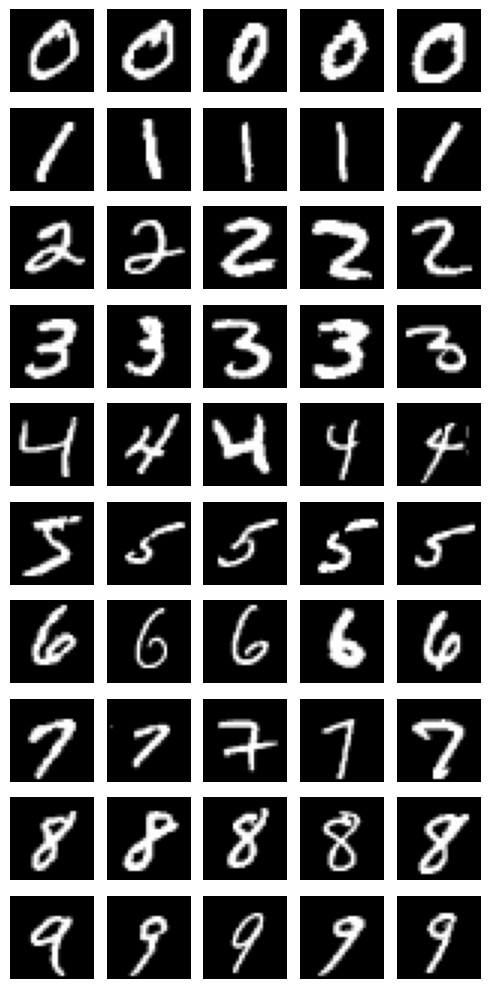

In [20]:

fig, axes = plt.subplots(10, 5, figsize=(5, 10))
axes = axes.flatten()
images=[]
for k in range(10):
    index = np.where(y_train == k)
    for i in range(5):
        images.append(data["x_train"][index[0][i]])
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [21]:
flattened=[]
for i in range(len(x_train)):
    flattened.append(x_train[i].flatten())
x_train=flattened


In [22]:
covariances=[]
means=[]
prioris=[]

for i in range(10):
    index = np.where(y_train == i)[0]   
    prioris.append(len(index)/len(y_train))
    matrix=[]
    for i in index:
        matrix.append(x_train[i])
    matrix=np.array(matrix)
    matrix=np.transpose(matrix)
    mean_matrix=np.mean(matrix, axis=1)
    cov_matrix = np.cov(matrix)+np.eye(784) * 1e-6
    covariances.append(cov_matrix)
    means.append(mean_matrix)

In [23]:
G_i=[]

for i in range(10):

    dict={}
    cov=covariances[i]
    mean=means[i]
    priori=prioris[i]
    meanT=np.transpose(mean)
    dict['Wi']=-0.5*(np.linalg.inv(cov))

    dict['wi']=np.matmul(np.linalg.inv(cov),mean) 

    # dict['wi0']=(-0.5*(np.matmul(np.matmul(meanT,np.linalg.pinv(cov)),mean)))-(0.5*(np.linalg.slogdet(cov)[1]))+ math.log(priori)
    dict['wi0']=(-0.5*(np.matmul(np.matmul(meanT,np.linalg.pinv(cov)),mean)))+ math.log(priori)

    G_i.append(dict.copy())


In [24]:
flattened=[]
for i in range(len(x_test)):
    flattened.append(x_test[i].flatten())
x_test=flattened

In [25]:
acurracies=[[0,0] for i in range(10) ]
for k in range(len(x_test)):
    x=x_test[k]
    xT=np.transpose(x_test[k])
    maxi='0'
    mIndex=0
    for i in range(10):
        curr=np.matmul(np.matmul(xT,G_i[i]['Wi']),x)
        curr+=np.matmul(np.transpose(G_i[i]['wi']),x) 
        curr+=G_i[i]['wi0']
        if ( maxi=='0' or curr>maxi):
            maxi=curr
            mIndex=i
        
    acurracies[y_test[k]][1] +=1
    if (mIndex==y_test[k]):
        acurracies[y_test[k]][0] +=1


In [26]:
cnt=0
total=0
print("class", "    Accuracy")
for i in acurracies:
    print(cnt,"       ", i[0]*100/i[1],"%")
    total+=i[0]*100/i[1]
    cnt+=1
print("Total Accuracy",(total/10),"%")

class     Accuracy
0         93.36734693877551 %
1         67.40088105726872 %
2         93.5077519379845 %
3         87.72277227722772 %
4         90.83503054989816 %
5         79.93273542600897 %
6         89.03966597077245 %
7         86.18677042801556 %
8         88.70636550308008 %
9         82.3587710604559 %
Total Accuracy 85.90580911494875 %


Q2

In [27]:
new_x_train=[]
for i in range(10):
    index = np.where(y_train == i)[0] 
    # for i in index:
    for i in index[:100]:
        # print(y_train[i])
        new_x_train.append(x_train[i])
new_x_train=np.transpose(new_x_train)
sums=[]
centralisedMean=np.mean(new_x_train,axis=1)

In [28]:
centralisedData=[]
for i in range(784):
    l=[]
    # for j in range(60000):
    for j in range(1000):
        l.append(new_x_train[i][j]- centralisedMean[i])
    centralisedData.append(l)

In [29]:
# S=np.matmul( centralisedData ,np.transpose(centralisedData))/59999
S=np.matmul( centralisedData ,np.transpose(centralisedData))/999

eigenvalues, eigenvectors = np.linalg.eigh(S)
eigenvalues = eigenvalues[::-1]
U = np.flip(eigenvectors, axis=1)

In [30]:
Y=np.matmul(np.transpose(U),centralisedData)
X_recon=np.matmul(U,Y)
MSE = ((centralisedData - X_recon)**2).mean()
print("Mean Squared Error: ",MSE)

Mean Squared Error:  2.33490761759844e-26


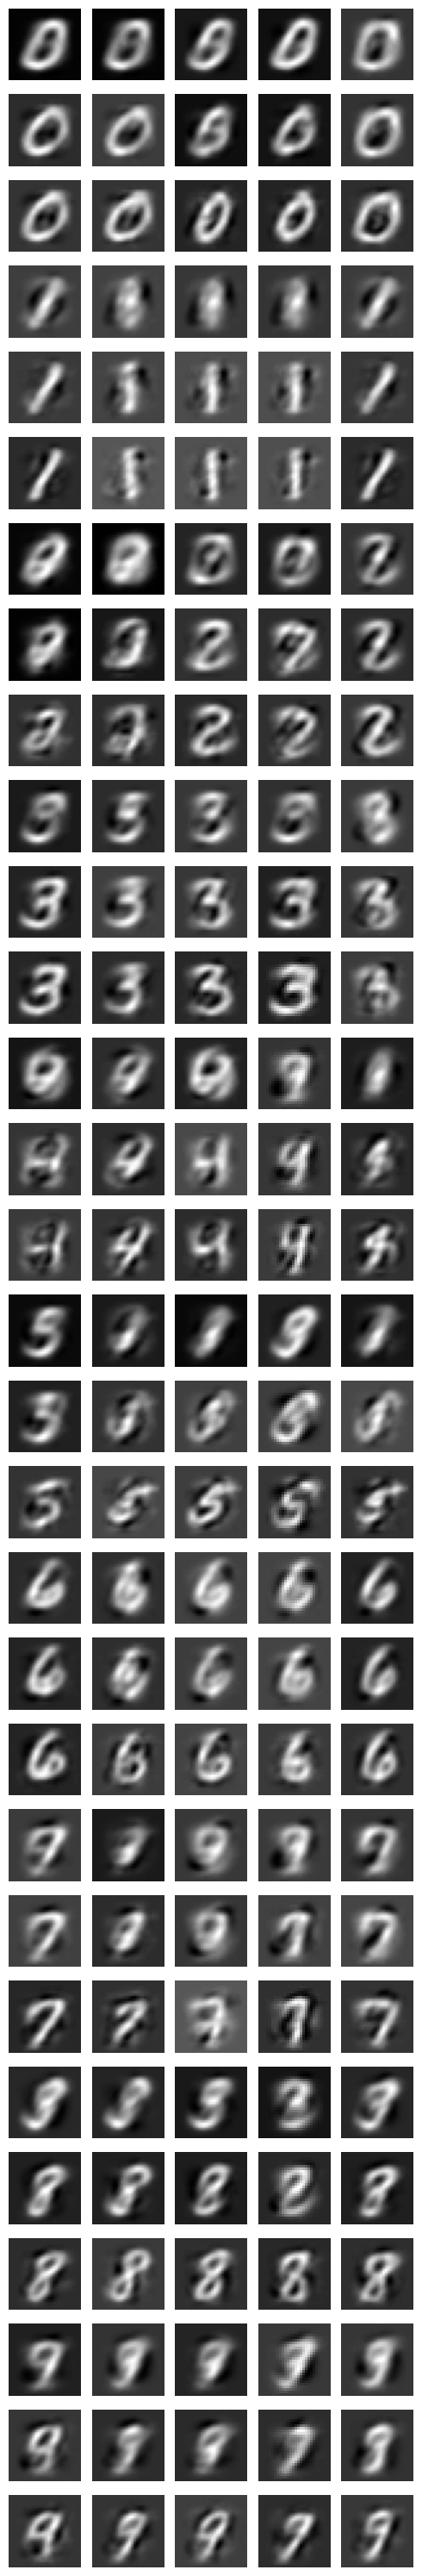

In [31]:
pVal=[5,10,20]
fig, axes = plt.subplots(30, 5, figsize=(5, 30))
axes = axes.flatten()
images=[]
for i in range(len(pVal)):
    p=pVal[i]
    Up=np.transpose(np.transpose(U)[:p])
    Yp=np.matmul(np.transpose(Up),centralisedData)
    Xp_recon=np.matmul(Up, Yp)
    Xp_recon=Xp_recon+centralisedMean[:, np.newaxis]
    Xp_recon=np.transpose(Xp_recon)
    Xp_img=[]
    for i in Xp_recon:
        Xp_img.append(i.reshape(28,28))
    
    
    for k in range(10):
        for i in range(5):
            images.append(Xp_img[k*100+i])

new_images=[]

for j in range(0,10):
    for i in [0,50,100]:
        for k in range(5):
            new_images.append(images[j*5+i+k])
  
for i, ax in enumerate((axes)):
    ax.imshow(new_images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [32]:
for p in pVal:
    nUp=U[:,:p]
    flattened=[]
    x_train=data['x_train']
    for i in range(len(x_train)):
        flattened.append(x_train[i].flatten())
    x_train=np.transpose(flattened)
    x_proj=np.matmul(nUp.T,x_train-x_train.mean(axis=1)[:,np.newaxis])
    covariances=[]
    means=[]
    prioris=[]

    for i in range(10):
        index = np.where(y_train == i)[0]   
        prioris.append(len(index)/len(y_train))
        matrix=[]
        for i in index:
            matrix.append(x_proj.T[i])
        matrix=np.array(matrix)
        matrix=np.transpose(matrix)
        mean_matrix=np.mean(matrix, axis=1)
        if (p==784):
            cov_matrix = np.cov(matrix)+np.eye(p)*1e-6
        else:
            cov_matrix = np.cov(matrix)
        covariances.append(cov_matrix)
        means.append(mean_matrix)

        
    G_i=[]

    for i in range(10):

        dict={}
        cov=covariances[i]
        mean=means[i]
        priori=prioris[i]
        meanT=np.transpose(mean)
        dict['Wi']=-0.5*(np.linalg.inv(cov))

        dict['wi']=np.matmul(np.linalg.inv(cov),mean) 

        dict['wi0']=(-0.5*(np.matmul(np.matmul(meanT,np.linalg.pinv(cov)),mean)))-(0.5*(np.linalg.slogdet(cov)[1]))+ math.log(priori)
        # dict['wi0']=(-0.5*(np.matmul(np.matmul(meanT,np.linalg.pinv(cov)),mean)))+ math.log(priori)

        G_i.append(dict.copy())

    flattened=[]
    x_test=data['x_test']
    for i in range(len(x_test)):
        flattened.append(x_test[i].flatten())
    x_test=np.transpose(flattened)
    nupt=nUp.T
    nY=np.matmul(nupt,x_test-x_test.mean(axis=1)[:,np.newaxis])
    nY=nY.T
    acurracies=[[0,0] for i in range(10) ]
    for k in range(len(nY)):
        x=nY[k]
        xT=np.transpose(nY[k])
        maxi='0'
        mIndex=0
        for i in range(10):
            curr=np.matmul(np.matmul(xT,G_i[i]['Wi']),x)
            curr+=np.matmul(np.transpose(G_i[i]['wi']),x) 
            curr+=G_i[i]['wi0']
            if ( maxi=='0' or curr>maxi):
                maxi=curr
                mIndex=i
        acurracies[y_test[k]][1] +=1
        if (mIndex==y_test[k]):
            acurracies[y_test[k]][0] +=1
    cnt=0
    total=0
    print("For p=", p)
    print("class", "    Accuracy")
    for i in acurracies:
        print(cnt,"       ", i[0]*100/i[1],"%")
        total+=i[0]*100/i[1]
        cnt+=1
    print("Total Accuracy",(total/10),"%")
    print("-"*40)

For p= 5
class     Accuracy
0         87.65306122448979 %
1         96.2114537444934 %
2         80.23255813953489 %
3         78.7128712871287 %
4         65.27494908350306 %
5         53.9237668161435 %
6         86.95198329853862 %
7         77.72373540856032 %
8         45.58521560574949 %
9         49.35579781962339 %
Total Accuracy 72.1625392427765 %
----------------------------------------
For p= 10
class     Accuracy
0         95.81632653061224 %
1         97.26872246696036 %
2         89.14728682170542 %
3         90.0990099009901 %
4         88.28920570264766 %
5         87.4439461883408 %
6         93.63256784968685 %
7         88.52140077821012 %
8         81.21149897330595 %
9         82.3587710604559 %
Total Accuracy 89.37887362729154 %
----------------------------------------
For p= 20
class     Accuracy
0         98.36734693877551 %
1         97.09251101321586 %
2         95.15503875968992 %
3         94.85148514851485 %
4         96.33401221995926 %
5         93.609865